<a href="https://colab.research.google.com/github/BISH0808/JavaScript_basics/blob/main/Notes_from_UlbiTV_video/UseRef_Dom_element_Uncontrol_component.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# хук useRef. Доступ к DOM элементу. Неуправляемый компонент

* В предыщем [My Notebook](https://colab.research.google.com/drive/1icmNg39s3qYyv2TinLEfqxhVsOBDgYOB#scrollTo=Kho01NXWlSmU)      мы начились получать данные из управляемого Inputa. В этом Notebook мы научимся получать данные из неуправляемого Inputa. Для этого можно воспользоваться новым хуком, который называется **useRef**. C помощью этого хука мы можем получить доступ к DOM элементу, и уже этого DOM элемента забрать value.

* Ниже показано, как использовать хук **useRef**.

* Ниже Вы вывидите как поменялось **App.js** по сравнению с [Notebook](https://colab.research.google.com/drive/1icmNg39s3qYyv2TinLEfqxhVsOBDgYOB#scrollTo=8xRPGuSUoNb_) :

In [ ]:
import React, {useState} from 'react';
import Counter from './components/Counter';
import ClassCounter from './components/ClassCounter';
import './styles/App.css'
import PostItem from './components/PostItem';
import Postlist from './components/Postlist';
import Mybutton from './components/UI/button/Mybutton';
import Myinput from './components/UI/input/Myinput';
import { useRef } from 'react';

function App() {
        const [posts, setPosts] = useState([
          {id: 1, title: 'Javasript', body: 'Description'},
          {id: 2, title: 'Javasript 2', body: 'Description'},
          {id: 3, title: 'Javasript 3', body: 'Description'},
          {id: 4, title: 'Javasript 4', body: 'Description'}
        ])

  const [title, setTitle]  = useState('Hi!')
  const bodyInputRef=useRef();
  const addNewPost = (e) => {
    // Предотвращаем обновление страницы при submit формы
    e.preventDefault()
    console.log(title)
    console.log(bodyInputRef.current.value)
  }


  return (
    <div className="App">
       <form>
        {/* Управляемый компонент */}
        <Myinput
          value={title}
          onChange={e => setTitle(e.target.value)}
          type="text"
          placeholder="Название поста"
        />
        <input ref={bodyInputRef} type="text"/>
        <Mybutton onClick={addNewPost}>Создать пост</Mybutton>
      </form>
      <Postlist posts={posts} title="Посты про JS"/>


    </div>
  );
}

export default App;


* Теперь при вводе в Input значения, мы будем видеть его в консоли:

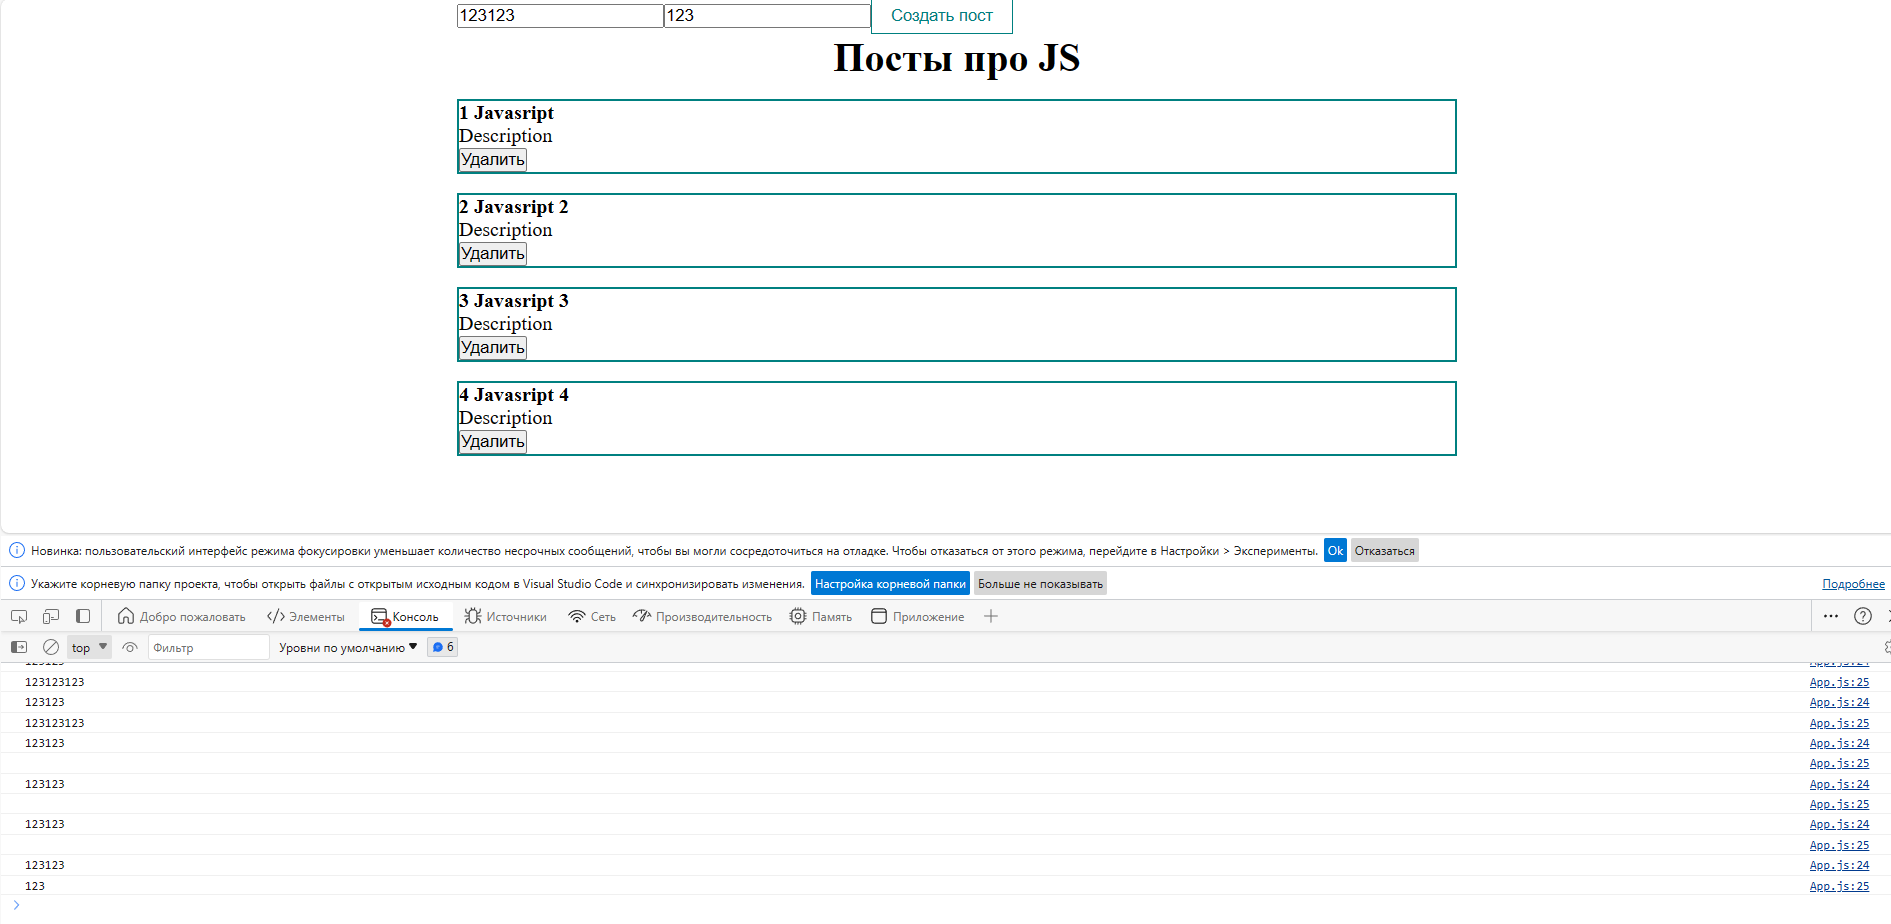

* Теперь научимся передавать ссылку в наш собственный компонент. Для этого обернем целиком весь компонент **Myinput** в функцию **forwardRef**.

In [ ]:
import React from 'react'
import classes from './MyInput.module.css'
const Myinput = React.forwardRef((props, ref) => {
  return (
    <input ref={ref} className={classes.Myinput} {...props}/>
  );
});

export default Myinput


* Теперь App.js будет выглядет вот так:

In [ ]:
import React, {useState} from 'react';
import Counter from './components/Counter';
import ClassCounter from './components/ClassCounter';
import './styles/App.css'
import PostItem from './components/PostItem';
import Postlist from './components/Postlist';
import Mybutton from './components/UI/button/Mybutton';
import Myinput from './components/UI/input/Myinput';
import { useRef } from 'react';

function App() {
        const [posts, setPosts] = useState([
          {id: 1, title: 'Javasript', body: 'Description'},
          {id: 2, title: 'Javasript 2', body: 'Description'},
          {id: 3, title: 'Javasript 3', body: 'Description'},
          {id: 4, title: 'Javasript 4', body: 'Description'}
        ])

  const [title, setTitle]  = useState('Hi!')
  const bodyInputRef=useRef();
  const addNewPost = (e) => {
    // Предотвращаем обновление страницы при submit формы
    e.preventDefault()
    console.log(title)
    console.log(bodyInputRef.current.value)
  }


  return (
    <div className="App">
       <form>
        {/* Управляемый компонент */}
        <Myinput
          value={title}
          onChange={e => setTitle(e.target.value)}
          type="text"
          placeholder="Название поста"
        />
{/* Неконтролируемый или неупарвляемый компонент */}
        <Myinput
          ref={bodyInputRef}
          type="text"
          placeholder="Описание поста"
        />
        <Mybutton onClick={addNewPost}>Создать пост</Mybutton>
      </form>
      <Postlist posts={posts} title="Посты про JS"/>


    </div>
  );
}

export default App;


* На странице увидим следующее:

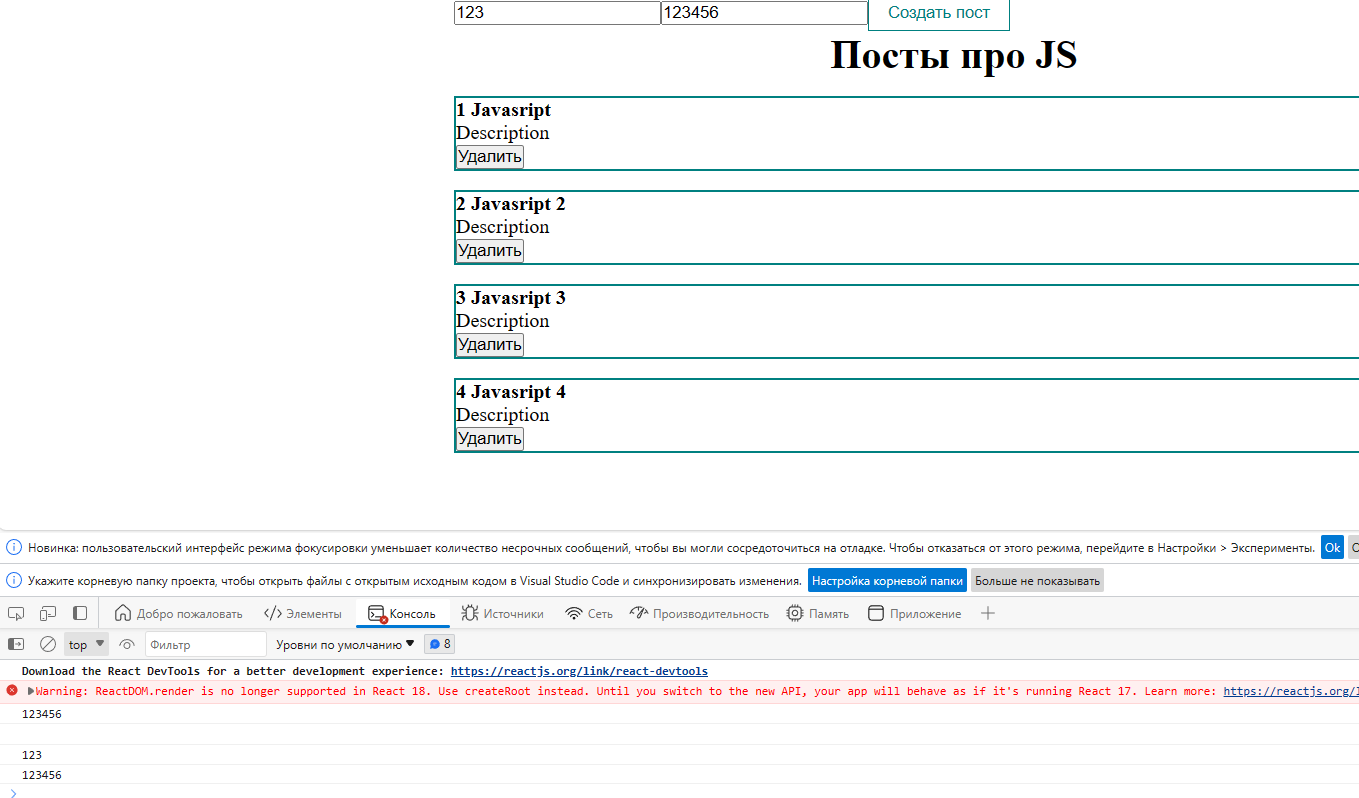

* В примере сверху компонет **Myinput** неуправляемый.